In [1]:
import os 
import pathlib
from mplsoccer import Pitch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Wedge


In [2]:
def get_file_path():
    
    str_off_ball = 'OffBall'
    path_off_ball_folder = os.path.join(str(pathlib.Path().resolve()), str_off_ball)
    off_ball_files = os.listdir(path_off_ball_folder)
    full_path = [os.path.join(path_off_ball_folder, file) for file in off_ball_files]
    
    return full_path

In [13]:
def get_off_ball_data():
    
    df_dict = {}
    path_to_file = get_file_path()
    
    for file in path_to_file:
        
        df = pd.read_parquet(file)
        file = os.path.basename(file)
        file = file.split('_')[-1].split('.')[0]
        print(path_to_file)
        df_dict[file] = df
    
    return df_dict
    

In [14]:
df_dict = get_off_ball_data()
df_events = df_dict['events']
df_tracks = df_dict['tracks']
df_runs = df_dict['runs']
df_stories = df_dict['stories']


['/Users/arinrahim/Documents/SKOLAN/Soccermatics/Assignments/Assignment 3/OffBall/18768058_runs.parquet', '/Users/arinrahim/Documents/SKOLAN/Soccermatics/Assignments/Assignment 3/OffBall/18768058_tracks.parquet', '/Users/arinrahim/Documents/SKOLAN/Soccermatics/Assignments/Assignment 3/OffBall/18768058_stories.parquet', '/Users/arinrahim/Documents/SKOLAN/Soccermatics/Assignments/Assignment 3/OffBall/18768058_events.parquet']
['/Users/arinrahim/Documents/SKOLAN/Soccermatics/Assignments/Assignment 3/OffBall/18768058_runs.parquet', '/Users/arinrahim/Documents/SKOLAN/Soccermatics/Assignments/Assignment 3/OffBall/18768058_tracks.parquet', '/Users/arinrahim/Documents/SKOLAN/Soccermatics/Assignments/Assignment 3/OffBall/18768058_stories.parquet', '/Users/arinrahim/Documents/SKOLAN/Soccermatics/Assignments/Assignment 3/OffBall/18768058_events.parquet']
['/Users/arinrahim/Documents/SKOLAN/Soccermatics/Assignments/Assignment 3/OffBall/18768058_runs.parquet', '/Users/arinrahim/Documents/SKOLAN/Soc

In [5]:
player_name = df_events.loc[df_events['player'].str.contains('Barella')].iloc[0]
player_name = player_name['player']

In [6]:
barella_runs = df_runs[df_runs.player_id == 'away_team_player_23']
barella_runs_xGRun = barella_runs[barella_runs.xGRun > 0]

barella_runs_in_possession = barella_runs[barella_runs['In possession runs'] == True]
barella_runs_out_possession = barella_runs[barella_runs['In possession runs'] == False]

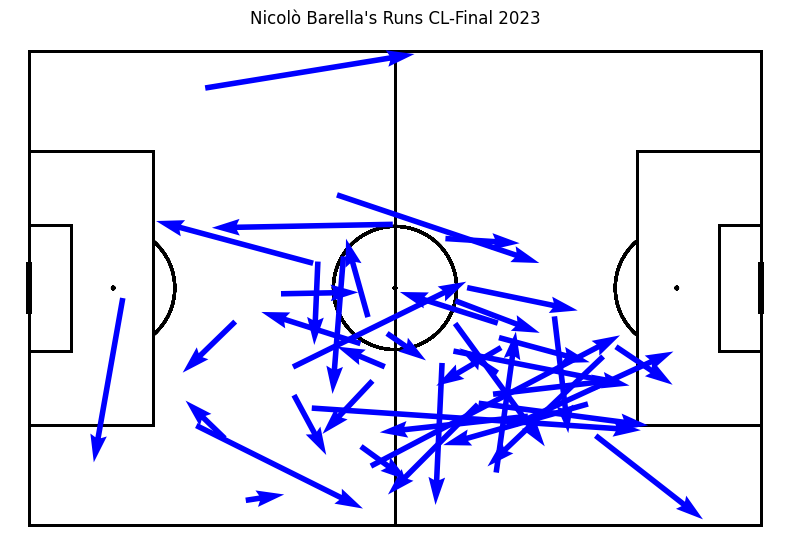

In [7]:
pitch = Pitch(pitch_type='opta', line_color='k')
fig, ax = pitch.draw(figsize=(8,6))

for idx, row in barella_runs.iterrows():
    pitch.arrows(row['start_x'], row['start_y'], row['end_x'], row['end_y'], color='b', ax=ax)
    pitch.draw(ax)
    
ax.set_title(f"{player_name}'s Runs CL-Final 2023")
plt.show()

In [8]:
starting_points_in = np.array(barella_runs_in_possession[['start_x', 'start_y']]) # In Possession 
end_points_in = np.array(barella_runs_in_possession[['end_x', 'end_y']])

direction_vectors_in = end_points_in - starting_points_in
angle_radian_in = np.arctan2(direction_vectors_in[:,1], direction_vectors_in[:, 0])
angles_degrees_in = np.degrees(angle_radian_in)

mean_sin_in = np.mean(np.sin(angle_radian_in))
mean_cos_in = np.mean(np.cos(angle_radian_in))
mean_angle_radians_in = np.arctan2(mean_sin_in, mean_cos_in)
mean_angle_in = np.degrees(mean_angle_radians_in) % 360

r_bar_in = np.sqrt(mean_sin_in**2 + mean_cos_in**2)
circular_std_dev_in = np.sqrt(-2 * np.log(r_bar_in))

mean_distance_all_runs_in = np.mean(np.linalg.norm(direction_vectors_in, axis=1))

mean_starting_points_in = np.mean(starting_points_in[:, 0]), np.mean(starting_points_in[:, 1])
mean_end_points_in = np.mean(end_points_in[:, 0]), np.mean(end_points_in[:, 1])

mean_angle_radians_in = np.radians(mean_angle_in)
end_point_x_in =  mean_starting_points_in[0] + mean_distance_all_runs_in * np.cos(mean_angle_radians_in)
end_point_y_in = mean_starting_points_in[1] + mean_distance_all_runs_in * np.sin(mean_angle_radians_in)

print("Adjusted Mean Direction (degrees):", mean_angle_in)
print("Directional Consistency (Standard Deviation in degrees):", np.degrees(circular_std_dev_in))
print("Calculated End Point X (Out of Possession):", end_point_x_in)
print("Calculated End Point Y (Out of Possession):", end_point_y_in)

Adjusted Mean Direction (degrees): 349.6404799766169
Directional Consistency (Standard Deviation in degrees): 51.09279337256136
Calculated End Point X (Out of Possession): 70.65639707781239
Calculated End Point Y (Out of Possession): 32.04814455682318


In [9]:
starting_points_out = np.array(barella_runs_out_possession[['start_x', 'start_y']]) # Out of Possession
end_points_out = np.array(barella_runs_out_possession[['end_x', 'end_y']])

direction_vectors_out = end_points_out - starting_points_out
angle_radian_out = np.arctan2(direction_vectors_out[:,1], direction_vectors_out[:, 0])
angles_degrees_out = np.degrees(angle_radian_out)

mean_sin_out = np.mean(np.sin(angle_radian_out))
mean_cos_out = np.mean(np.cos(angle_radian_out))
mean_angle_radians_out = np.arctan2(mean_sin_out, mean_cos_out)
mean_angle_out = np.degrees(mean_angle_radians_out) % 360

r_bar_out = np.sqrt(mean_sin_out**2 + mean_cos_out**2)
circular_std_dev_out = np.sqrt(-2 * np.log(r_bar_out))

mean_distance_all_runs_out = np.mean(np.linalg.norm(direction_vectors_out, axis=1))

mean_starting_points_out = np.mean(starting_points_out[:, 0]), np.mean(starting_points_out[:, 1])
mean_end_points_out = np.mean(end_points_out[:, 0]), np.mean(end_points_out[:, 1])

mean_angle_radians_out = np.radians(mean_angle_out)
end_point_x_out =  mean_starting_points_out[0] + mean_distance_all_runs_out * np.cos(mean_angle_radians_out)
end_point_y_out = mean_starting_points_out[1] + mean_distance_all_runs_out * np.sin(mean_angle_radians_out)

print("R_bar: ", r_bar_out)
print("Adjusted Mean Direction (degrees):", mean_angle_out)
print("Directional Consistency (Standard Deviation in degrees):", np.degrees(circular_std_dev_out))
print("Calculated End Point X (Out of Possession):", end_point_x_out)
print("Calculated End Point Y (Out of Possession):", mean_angle_in - circular_std_dev_out)

R_bar:  0.3755743188914973
Adjusted Mean Direction (degrees): 233.6980805362919
Directional Consistency (Standard Deviation in degrees): 80.18539358567432
Calculated End Point X (Out of Possession): 42.66467188874167
Calculated End Point Y (Out of Possession): 348.24098084653934


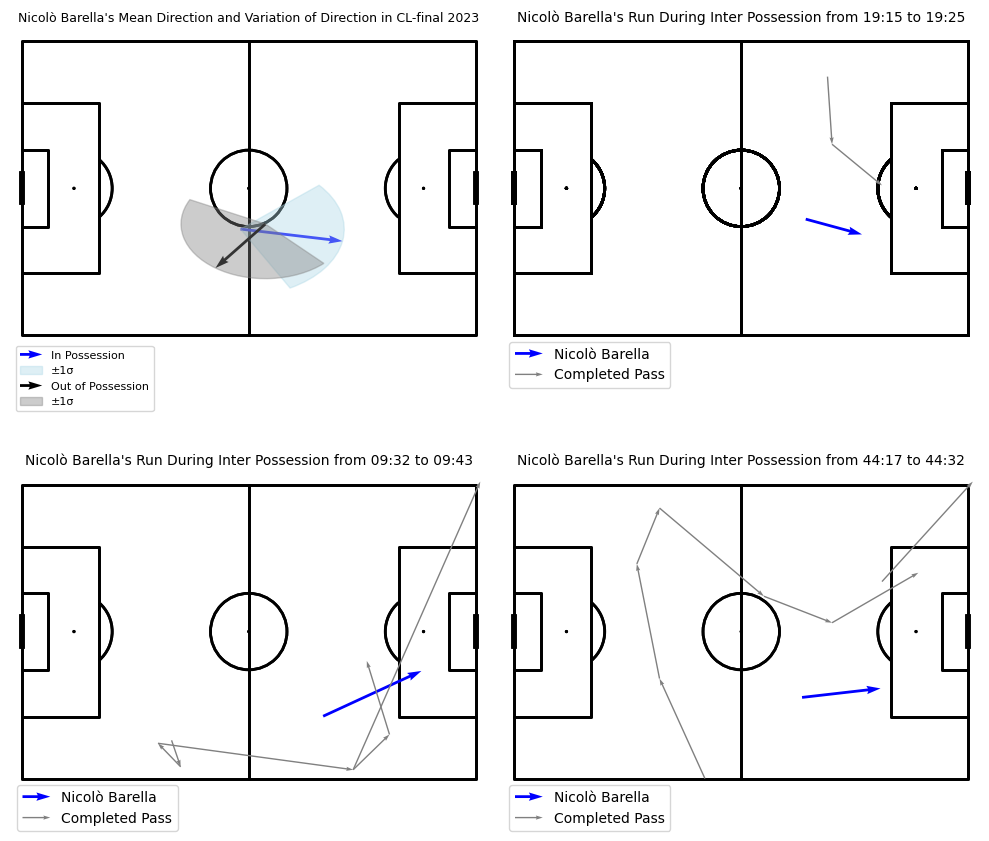

In [10]:
pitch = Pitch(pitch_type = 'opta', line_color='k')
fig, ax = pitch.draw(ncols = 2, nrows = 2, figsize=(10, 15))

ax1 = ax[0, 0]
pitch.arrows(mean_starting_points_in[0], mean_starting_points_in[1], end_point_x_in, end_point_y_in, ax = ax1, color='b', width = 2 ,label = 'In Possession')
wedge_in = Wedge(mean_starting_points_in, mean_distance_all_runs_in, mean_angle_in - np.degrees(circular_std_dev_in), mean_angle_in + np.degrees(circular_std_dev_in), color='lightblue', alpha= 0.4, label = '±1σ')
ax1.add_patch(wedge_in)

pitch.arrows(mean_starting_points_out[0], mean_starting_points_out[1],end_point_x_out, end_point_y_out, ax = ax1, color='k', width = 2 ,label = 'Out of Possession')
wedge_out = Wedge(mean_starting_points_out, mean_distance_all_runs_out, mean_angle_out - np.degrees(circular_std_dev_out), mean_angle_out + np.degrees(circular_std_dev_out), color = 'gray', alpha = 0.4, label = '±1σ')
ax1.add_patch(wedge_out)

ax1.set_title(f"{player_name}'s Mean Direction and Variation of Direction in CL-final 2023", fontsize=9)
ax1.legend(loc='lower left', bbox_to_anchor=(0, -0.22), fontsize=8)
pitch.draw(ax1)

ax2 = ax[0, 1]
pass_legend = False
first_possession = barella_runs_xGRun.possession_id.iloc[0]
pitch.arrows(barella_runs_xGRun.start_x.iloc[0], barella_runs_xGRun.start_y.iloc[0], barella_runs_xGRun.end_x.iloc[0], barella_runs_xGRun.end_y.iloc[0], ax = ax2, color='b', width = 2, label = player_name)
df_stories_first_possession = df_stories[df_stories.possession_id == first_possession]
for idx, row in df_stories_first_possession.iterrows():
    possession = df_runs[df_runs['possession_id'] == first_possession]
    possession_start = possession['time_start'].min()[0:5]
    possession_end = possession['time_end'].max()[0:5]
    if row['end_x'] >= 0:
        if not pass_legend:
            pitch.arrows(row['start_x'], row['start_y'], row['end_x'], row['end_y'], ax = ax2, color='grey', width= 1, label = 'Completed Pass')
            pitch.draw(ax2)
            pass_legend = True 
        else: 
            pitch.arrows(row['start_x'], row['start_y'], row['end_x'], row['end_y'], ax = ax2, color='grey', width= 1)
            pitch.draw(ax2)
ax2.set_title(f"{player_name}'s Run During Inter Possession from {possession_start} to {possession_end}", fontsize = 10)
ax2.legend(loc = 'lower left', bbox_to_anchor=(0, -0.15))
pitch.draw(ax2)

ax3 = ax[1, 0]
pass_legend = False
second_possession = barella_runs_xGRun.possession_id.iloc[1]
pitch.arrows(barella_runs_xGRun.start_x.iloc[1], barella_runs_xGRun.start_y.iloc[1], barella_runs_xGRun.end_x.iloc[1], barella_runs_xGRun.end_y.iloc[1], ax = ax3, color='b', width = 2, label = player_name)
df_stories_second_possession = df_stories[df_stories.possession_id == second_possession]
for idx, row in df_stories_second_possession.iterrows():
    possession = df_runs[df_runs['possession_id'] == second_possession]
    possession_start = possession['time_start'].min()[0:5]
    possession_end = possession['time_end'].max()[0:5]
    if row['end_x'] >= 0:
        if not pass_legend:
            pitch.arrows(row['start_x'], row['start_y'], row['end_x'], row['end_y'], ax = ax3, color='grey', width= 1, label = 'Completed Pass')
            pitch.draw(ax2)
            pass_legend = True 
        else: 
            pitch.arrows(row['start_x'], row['start_y'], row['end_x'], row['end_y'], ax = ax3, color='grey', width= 1)
            pitch.draw(ax2)
ax3.set_title(f"{player_name}'s Run During Inter Possession from {possession_start} to {possession_end}", fontsize = 10)
ax3.legend(loc = 'lower left', bbox_to_anchor=(0, -0.15))
pitch.draw(ax3)


ax4 = ax[1, 1]
pass_legend = False
third_possession = barella_runs_xGRun.possession_id.iloc[2]
pitch.arrows(barella_runs_xGRun.start_x.iloc[2], barella_runs_xGRun.start_y.iloc[2], barella_runs_xGRun.end_x.iloc[2], barella_runs_xGRun.end_y.iloc[2], ax = ax4, color='b', width = 2, label = player_name)
df_stories_third_possession = df_stories[df_stories.possession_id == third_possession]
for idx, row in df_stories_third_possession.iterrows():
    possession = df_runs[df_runs['possession_id'] == third_possession]
    possession_start = possession['time_start'].min()[0:5]
    possession_end = possession['time_end'].max()[0:5]
    if row['end_x'] >= 0:
        if not pass_legend:
            pitch.arrows(row['start_x'], row['start_y'], row['end_x'], row['end_y'], ax = ax4, color='grey', width= 1, label = 'Completed Pass')
            pitch.draw(ax2)
            pass_legend = True 
        else: 
            pitch.arrows(row['start_x'], row['start_y'], row['end_x'], row['end_y'], ax = ax4, color='grey', width= 1)
            pitch.draw(ax2)
ax4.set_title(f"{player_name}'s Run During Inter Possession from {possession_start} to {possession_end}", fontsize = 10)
ax4.legend(loc = 'lower left', bbox_to_anchor=(0, -0.15))
pitch.draw(ax4)

fig.savefig("player_runs.png", format='png', dpi=400, bbox_inches='tight')




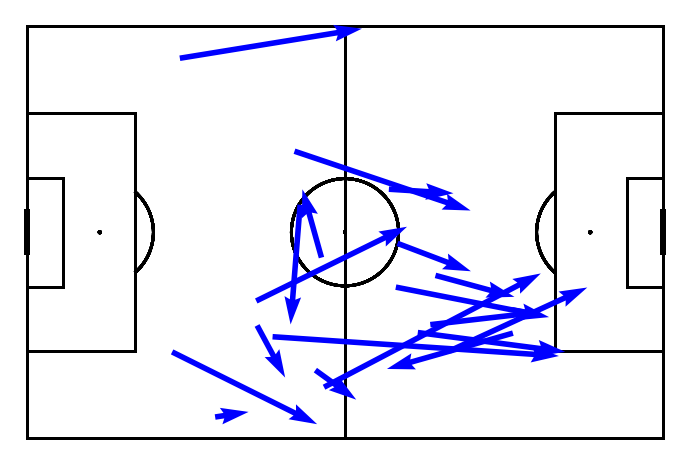

In [11]:
pitch = Pitch(pitch_type='opta', line_color='k')
fig, ax = pitch.draw(figsize=(7, 5))

for idx, row in barella_runs_in_possession.iterrows(): 
    pitch.arrows(row['start_x'], row['start_y'], row['end_x'], row['end_y'], ax=ax, color='b', label='In Possession')
    pitch.draw(ax)

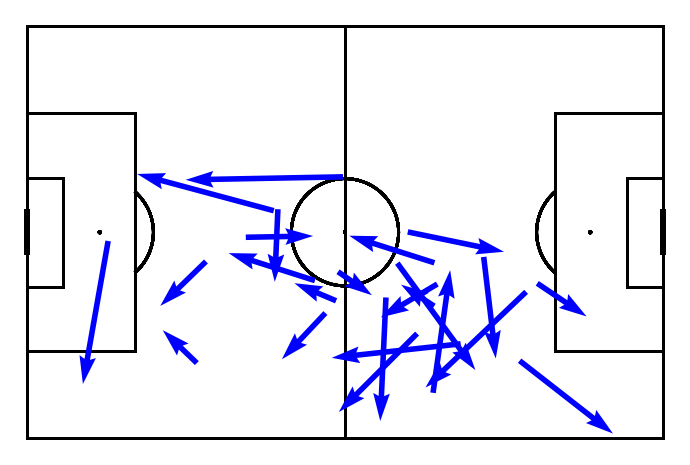

In [12]:
pitch = Pitch(pitch_type='opta', line_color='k')
fig, ax = pitch.draw(figsize=(7, 5))

for idx, row in barella_runs_out_possession.iterrows(): 
    pitch.arrows(row['start_x'], row['start_y'], row['end_x'], row['end_y'], ax=ax, color='b', label='In Possession')
    pitch.draw(ax)